# Problem Set 3

Question 1

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

step 3. Assign it to a variable called users

In [48]:
#reference : https://www.kaggle.com/daguangya/pandas-exercises-3-2
#reference : https://stackoverflow.com/questions/53060915/how-to-get-the-rolling-mean-and-find-the-percentage-of-male-and-female-in-each-o
import pandas as pd
import numpy as np
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


Step 4. Discover what is the mean age per occupation

In [3]:
users.groupby('occupation').age.mean()

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [2]:
users['male'] = users.gender.apply(lambda x: True if x == 'M' else False)
users.male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: male, Length: 943, dtype: bool

Step 6. For each occupation, calculate the minimum and maximum ages

In [5]:
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

Step 7. For each combination of occupation and sex, calculate the mean age

In [6]:
print(users.groupby('occupation').age.min())
print(users.groupby('occupation').age.max())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


Step 8. For each occupation present the percentage of women and men

In [5]:
print(users.groupby(['occupation','gender'])['age'].mean())

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [20]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
result = occup_gender.iloc[: ,1]
result

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

# Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

In [54]:
#ref : https://www.kaggle.com/daguangya/pandas-exercises-2-2

import pandas as pd
import numpy as np
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep = ',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [31]:
euro12.iloc[:,1]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [33]:
len(euro12['Team'])

16

What is the number of columns in the dataset?

In [35]:
len(euro12.columns)

35

View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [38]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [47]:
discipline.sort_values(["Red Cards","Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [50]:
euro12['Yellow Cards'].mean()

7.4375

Step 10. Filter teams that scored more than 6 goals

In [51]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [52]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [53]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [55]:
euro12.iloc[:,0:32]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [63]:
euro12.loc[[3,7,12], ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

In [28]:
#### import numpy as np
import pandas as pd
series1 = pd.Series(np.random.randint(1, high=5, size=100))
series2 = pd.Series(np.random.randint(1, high=4, size=100))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100))
Housing = pd.concat([series1, series2, series3], axis=1)
Housing

,0,1,2
0,4,2,12953
1,3,3,27237
2,4,2,17545
3,3,3,22705
4,1,2,16873
...,...,...,...
95,4,2,11026
96,3,1,19768
97,4,1,16628
98,3,2,21693


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [59]:
Housing.rename(columns={0 : 'bedr', 1 : 'bathrs', 2 : 'price_sqr_meter'})
Housing

,bedrs,bathrs,price_sqr_meter
0,3,1,19717
1,1,3,25862
2,3,2,18099
3,4,1,14967
4,1,1,26218


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [63]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))
bigcolumn

,0
0,3
1,1
2,3
3,4
4,1
...,...
95,12902
96,20702
97,29500
98,25551


Step 6. Ops it seems it is going only until index 99. Is it true?

In [66]:
print(Housing)

    bedrs  bathrs  price_sqr_meter
0       3       1            19717
1       1       3            25862
2       3       2            18099
3       4       1            14967
4       1       1            26218
..    ...     ...              ...
95      1       3            12902
96      3       3            20702
97      1       3            29500
98      4       3            25551
99      2       2            19389

[100 rows x 3 columns]


Step 7. Reindex the DataFrame so it goes from 0 to 299

In [67]:
Housing.reindex(index=range(0,299))

,bedrs,bathrs,price_sqr_meter
0,3.0,1.0,19717.0
1,1.0,3.0,25862.0
2,3.0,2.0,18099.0
3,4.0,1.0,14967.0
4,1.0,1.0,26218.0
...,...,...,...
294,NaN,NaN,NaN
295,NaN,NaN,NaN
296,NaN,NaN,NaN
297,NaN,NaN,NaN


# Problem 4

In [67]:
import pandas as pd
import datetime
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+")
print(data)

      Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     61   1   4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     61   1   5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...    ...   
6569  78  12  27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  78  12  28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  78  12  29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  78  12  30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  78  12  31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.6

In [81]:
data[['Yr','Mo','Dy']] = data[['Yr','Mo','Dy']].apply(pd.to_datetime, format='%Y-%m-%d')
data.rename(columns={"Yr":"date"}, inplace = True)
data.drop("Mo", axis=1, inplace=True)
data.drop("Dy", axis=1, inplace=True)
newdata.index.astype("datetime64[ns]")

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1970-01-01 00:00:00.000000061,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1970-01-01 00:00:00.000000061,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1970-01-01 00:00:00.000000061,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1970-01-01 00:00:00.000000061,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1970-01-01 00:00:00.000000061,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1970-01-01 00:00:00.000000078,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1970-01-01 00:00:00.000000078,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1970-01-01 00:00:00.000000078,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1970-01-01 00:00:00.000000078,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below

In [82]:
data.isnull().sum()

date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

Step 7. Compute how many non-missing values there are in total

In [85]:
data.isnull().sum().sum()

31

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times

In [87]:
data.mean().mean()

<ipython-input-87-e9c1cd44013d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean().mean()


10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [88]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

<ipython-input-88-d96d8ba15742>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  loc_stats['mean']=data.mean()


,min,max,mean,std
date,1970-01-01 00:00:00.000000061,1970-01-01 00:00:00.000000078,NaN,0 days 00:00:00.000000005
RPT,0.67,35.8,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.5,33.84,11.660526,5.00845
KIL,0.0,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.0,26.16,7.092254,3.968683
DUB,0.0,30.37,9.797343,4.977555
CLA,0.0,31.08,8.495053,4.499449
MUL,0.0,25.88,8.493590,4.166872


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each
day.

In [90]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

<ipython-input-90-773931a76c99>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  day_stats['mean']=data.mean(axis=1)


,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356
...,...,...,...,...
6569,8.08,40.08,16.708333,7.868076
6570,5.00,41.46,15.150000,9.687857
6571,8.71,29.58,14.890000,5.756836
6572,9.13,28.79,15.367500,5.540437


# Problem 5 

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

In [40]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')
chipo
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [173]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 6. What is the number of columns in the dataset?

In [175]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.

In [176]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [177]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [180]:
most = chipo.groupby('item_name').count()
most.

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,54,54,54,54
Barbacoa Bowl,66,66,66,66
Barbacoa Burrito,91,91,91,91
Barbacoa Crispy Tacos,11,11,11,11
Barbacoa Salad Bowl,10,10,10,10
Barbacoa Soft Tacos,25,25,25,25
Bottled Water,162,162,0,162
Bowl,2,2,2,2
Burrito,6,6,6,6


Step 10. For the most-ordered item, how many items were ordered?

In [181]:
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

Step 11. What was the most ordered item in the choice_description column?

In [188]:
chipo.choice_description.value_counts()

[Diet Coke]                                                                                                                                                                                      134
[Coke]                                                                                                                                                                                           123
[Sprite]                                                                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                                                                 40
               

Step 12. How many items were orderd in total?

In [187]:
sum(chipo['quantity'])

4972

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [52]:
chipo_float = chipo
chipo_float['item_price'] = chipo_float['item_price'].apply(lambda row: float(row))
print(chipo_float['item_price'])
print(chipo_float['item_price'].dtypes)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64
float64


Step 14. How much was the revenue for the period in the dataset?

In [56]:
revenue = (chipo['item_price']*chipo['quantity']).sum()
revenue

39237.02

Step 15. How many orders were made in the period?

In [61]:
len(chipo['order_id'].value_counts())

1834

Step 16. What is the average revenue amount per order?

In [63]:
chipo.groupby('order_id').mean()

,quantity,item_price
order_id,,
1,1.0,2.890000
2,2.0,16.980000
3,1.0,6.335000
4,1.0,10.500000
5,1.0,6.850000
...,...,...
1830,1.0,11.500000
1831,1.0,4.300000
1832,1.0,6.600000


In [65]:
len(chipo['item_name'].unique())

50

# Problem 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend

Text(0.5, 0, 'Year')

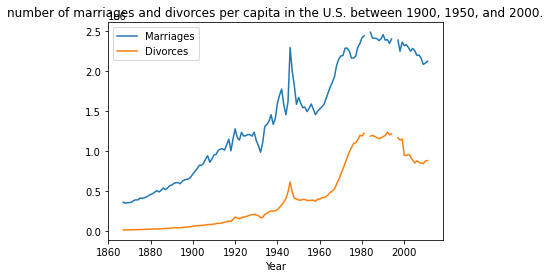

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
line=pd.read_csv('us-marriages-divorces-1867-2014.csv')
line.plot(kind='line',x='Year',y={'Marriages','Divorces'})
plt.title("number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.")
plt.xlabel("Year")

# Problem 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 0, 'Year')

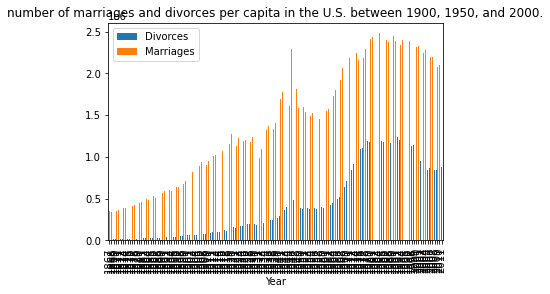

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
vertical=pd.read_csv('us-marriages-divorces-1867-2014.csv')
vertical.plot(kind='bar',x='Year',y={'Marriages','Divorces'})
plt.title("number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.")
plt.xlabel("Year")

# Problem 8 

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0, 0.5, 'Actor')

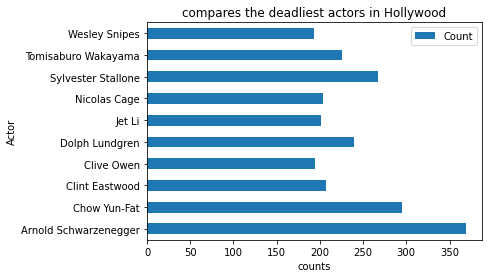

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
horizontal = pd.read_csv("actor_kill_counts.csv")
horizontal.groupby(['Actor']).sum().plot(kind='barh')
plt.title("compares the deadliest actors in Hollywood")
plt.xlabel("counts")
plt.ylabel("Actor")

# Problem 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

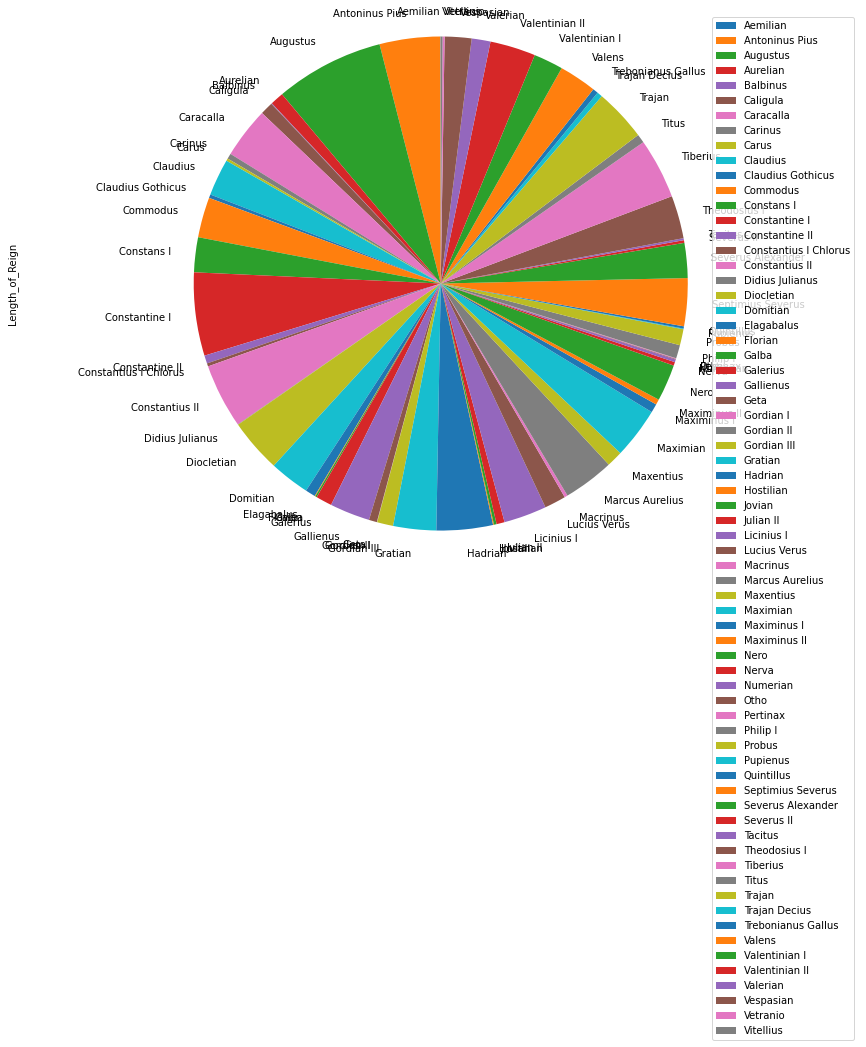

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
p=pd.read_csv("roman-emperor-reigns.csv")
Assassin = df[p["Cause_of_Death"]=="Assassinated"]
df.groupby(['Emperor']).sum().plot(kind='pie',subplots=True,startangle=90,figsize=(15,10))
plt.axis('equal')
plt.show()

# Problem 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.

Text(0.5, 1.0, 'the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.')

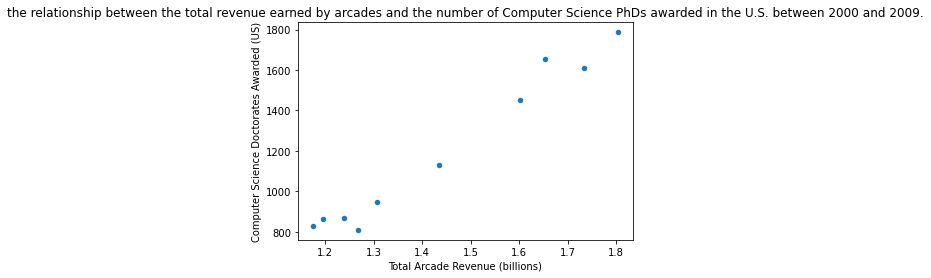

In [39]:
#Ref: https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms
import pandas as pd
import matplotlib.pyplot as plt
scattered=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
scattered.plot(kind='scatter',x='Total Arcade Revenue (billions)',y='Computer Science Doctorates Awarded (US)')
plt.title("the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.")